# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Reducción de dimensionalidad</center>
### <center> Práctica</center>

#### Algunas técnicas son:

* Eliminar variables correlacionadas
* Eliminar variables con baja varianza
* Dejar variables con mayor importancia utilizando algún algoritmo que brinde importancia de atributos
* PCA
* Tsne
* MDS
* IsoMap

### PCA - Análisis de Componentes Principales

Procedimiento matemático por el cual se transforma un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas de menor dimensión. Estas nuevas variables se obtiene a partir de combinaciones lineales de las variables originales. <br>
Estas nuevas variables son las que se denominan Componentes Principales

Esta técnica intenta hallar aquellas combinaciones lineales de las variables originales que maximizan la varianza (minimizan la pérdida de información original)

Esta técnica no requiere supuestos por lo que puede aplicarse siempre (pero, ojo!, tendrá sentido si las variables originales están correlacionadas)

El objetivo es reducir la dimensión del problema, es decir, descartar la información redundante

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Ejemplo 1

PCA ejecutado en 6 pasos:

Normalizar los atributos <br>
Calcular la matriz de covarianza <br>
Calcular autovalores y autovectores <br>
Ordenar los autovalores por orden descendente para elegir las componentes a utilizar<br>
Ordenar los autovectores en función del orden de los autovalores y armar la matriz de transformación<br>

In [ ]:
from sklearn.preprocessing import StandardScaler

columnas_elegidas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

x = df_iris.loc[:, columnas_elegidas].values
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) #Luego veremos como determinar la cantidad de componentes
x_transformada = pca.fit_transform(x)

pca_df_aux = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2','cp_3','cp_4'])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [ ]:
pca.get_covariance()

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
target=pd.DataFrame((np.column_stack(iris['target'])).tolist()).T
df_iris_pca = pd.concat([pca_df_aux, target], axis = 1)
df_iris_pca.columns= ['cp_1', 'cp_2','cp_3','cp_4','target']

In [ ]:
df_iris_pca.head(5)

,cp_1,cp_2,cp_3,cp_4,target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0


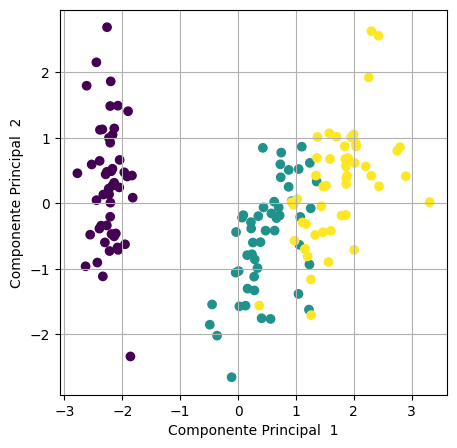

In [ ]:
targets = ['Setosa', 'Versicolor', 'Virginica']
fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=df_iris_pca['cp_1'],y=df_iris_pca['cp_2'],c=df_iris_pca['target'])
ax.set_xlabel('Componente Principal  1', fontsize = 10)
ax.set_ylabel('Componente Principal  2', fontsize = 10)
ax.grid()

plt.show()

In [ ]:
varianza_explicada=pca.explained_variance_ratio_
print(varianza_explicada)

[0.72962445 0.22850762 0.03668922 0.00517871]


In [ ]:
varianza_explicada.cumsum()

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

In [ ]:
pca.get_covariance()

array([[ 0.97819301, -0.10924971,  0.87080719,  0.86106627],
       [-0.10924971,  1.00389019, -0.42723904, -0.38252015],
       [ 0.87080719, -0.42723904,  1.04618124,  0.93698493],
       [ 0.86106627, -0.38252015,  0.93698493,  0.99858119]])

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

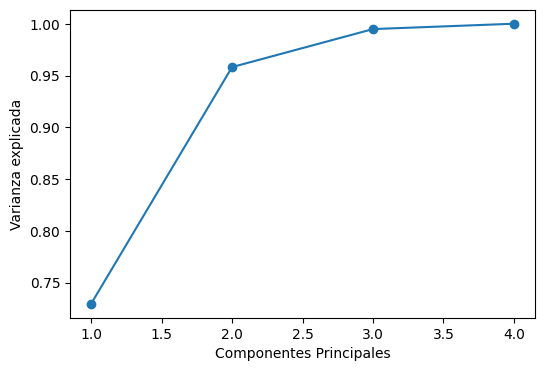

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada)+1))

# Grafico varianza explicada y cantidad de componentes principales
plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada.cumsum(), '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Variabilidad explicada')
plt.show()

### Ejemplo 2

#### Usando PCA para compresión de imágenes
 Una imagen puede ser tratada como una matriz, con los valores de cada celda siendo la intensidad de cada pixel
 Los pasos básicos que seguiremos son:
 - Aplicar PCA a la matriz de la imagen para reducir la dimensionalidad a un pequeño número de componentes principales
 - Para anlizar cuanta información visual conserva, vamos a reconstruir la imagen desde el número de componentes seleccionado
 - Analizaremos que tan buenas resultan las reconstrucciones para distintos números de componentes principales

In [ ]:
from matplotlib.image import imread

(720, 1280, 3)


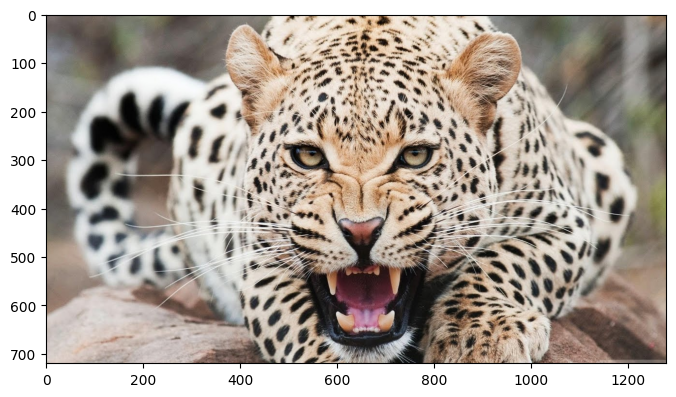

In [ ]:
image_raw = imread("./datasets/wild.jpg")
print(image_raw.shape)

plt.figure(figsize=[8, 6])
plt.imshow(image_raw)
plt.show()

 **Sobre la imagen** <br>
La imagen es a color y posee 3 canales: rojo, verde y azul. <br>
Su dimensionalidad es de 720x1280x3, osea 3 matrices de 720 x 1280, una para cada color.

Aunque podríamos trabajar con los 3 colores, para el propósito de este ejercicio no basta con uno, por lo que convertiremos la imagen a escala de grises.

 **Convirtiendo a escala de grises** -
 1. Para cada pixel sumamos los valores de los 3 colores (RGB).
 2. Normalizamos los valores dividiendo por el valor máximo de toda la imagen, obteniendo todos valores entre 0 y 1

 Dibujamos la matriz en escala de grises

(720, 1280)
1.0


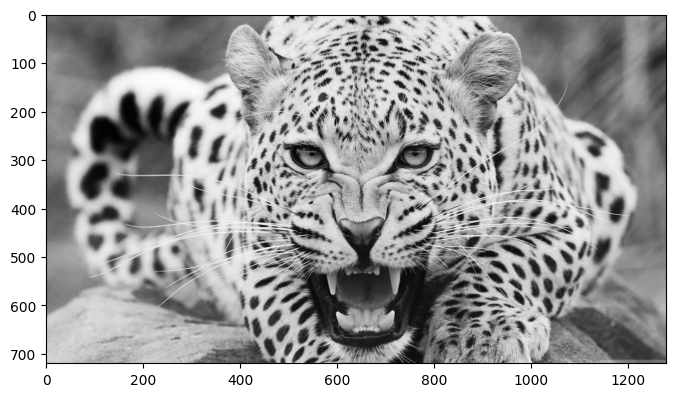

In [ ]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum / image_sum.max()
print(image_bw.max())

plt.figure(figsize=[8, 6])
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.show()

In [ ]:
len(image_bw[0])

1280

In [ ]:
pca_imagen = PCA()
pca_imagen.fit(image_bw)

PCA()

In [ ]:
var_cumu = np.cumsum(pca_imagen.explained_variance_ratio_) * 100

In [ ]:
k = np.argmax(var_cumu > 95)
print(
    "El numero minimo de componentes para explicar el 95% de la varianza es: " + str(k)
)

El numero minimo de componentes para explicar el 95% de la varianza es: 74


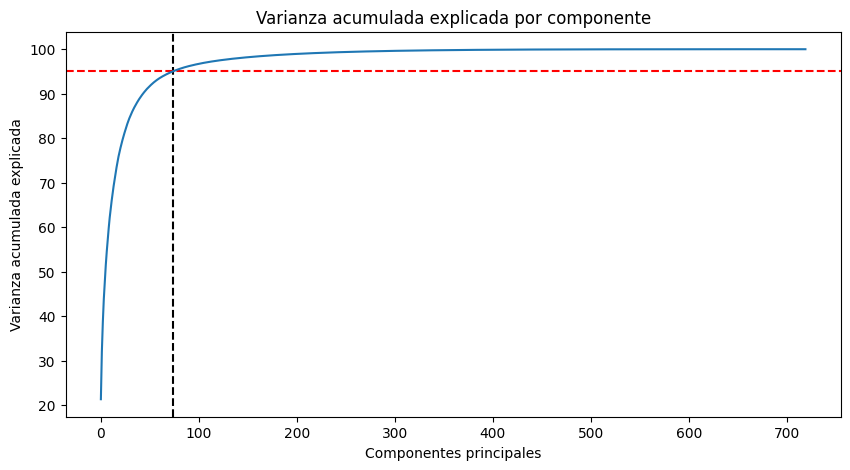

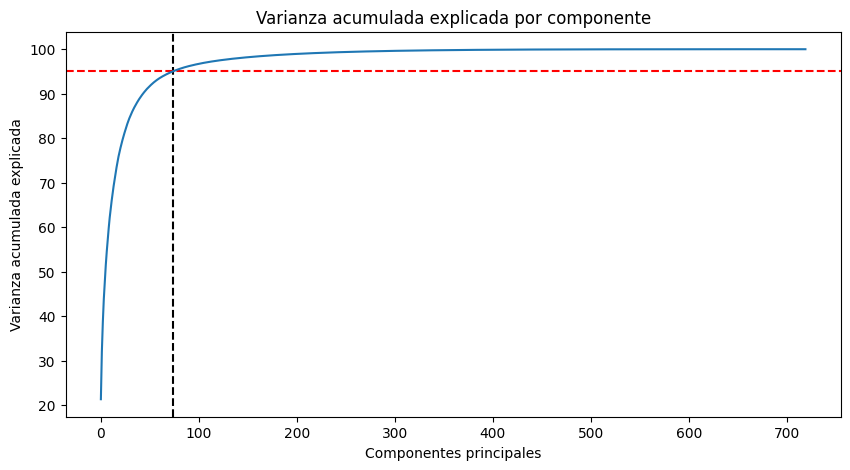

In [ ]:
plt.figure(figsize=[10, 5])
plt.title('Varianza acumulada explicada por componente')
plt.ylabel('Varianza acumulada explicada')
plt.xlabel('Componentes principales')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.show()

In [ ]:
ipca = PCA(n_components=k)
ipca_transform=ipca.fit_transform(image_bw)

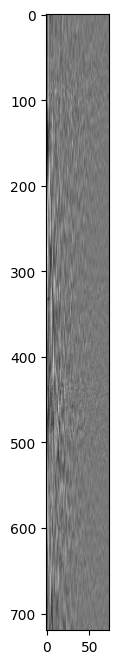

In [ ]:
plt.figure(figsize=[12, 8])
plt.imshow(ipca_transform, cmap=plt.cm.gray)
plt.show()

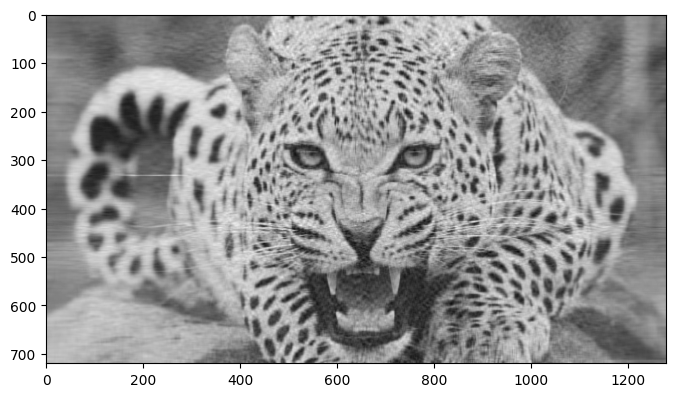

In [ ]:
image_recon = ipca.inverse_transform(ipca_transform)
plt.figure(figsize=[8,6])
plt.imshow(image_recon, cmap=plt.cm.gray)
plt.show()

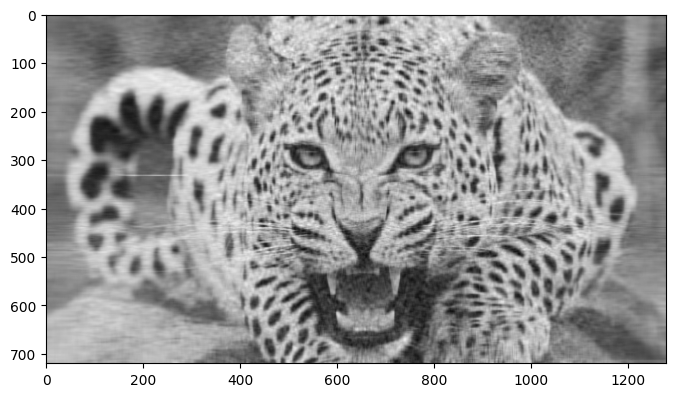

In [ ]:
ipca_2 = PCA(n_components=50)
ipca_2.fit(image_bw)
ipca_transform_2=ipca_2.transform(image_bw)

image_recon_2 = ipca_2.inverse_transform(ipca_transform_2)
plt.figure(figsize=[8, 6])
plt.imshow(image_recon_2, cmap=plt.cm.gray)
plt.show()

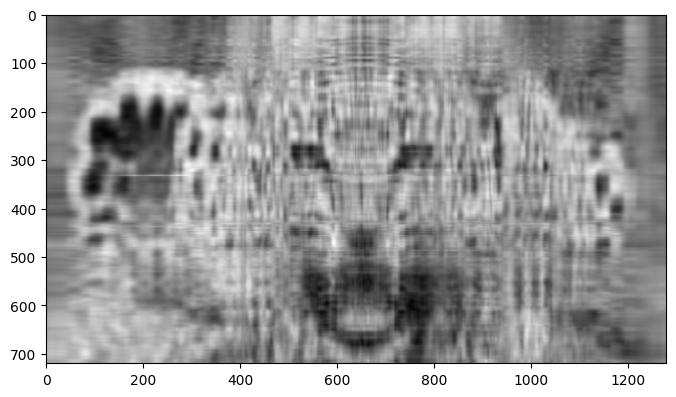

In [ ]:
ipca_3 = PCA(n_components=10)
ipca_3.fit(image_bw)
ipca_transform_3=ipca_3.transform(image_bw)

image_recon_3 = ipca_3.inverse_transform(ipca_transform_3)
plt.figure(figsize=[8, 6])
plt.imshow(image_recon_3, cmap=plt.cm.gray)
plt.show()

### TSNE - Distributed Stochastic Neighbor Embedding

Técnica de reducción de la dimensionalidad que preserva la noción de vecindad que se encuentra en el espacio original. <br>
(Es una mejora de SNE)

Esta técnica comienza convirtiendo la distancia Euclídea entre los puntos del espacio original a probabilidades condicionales.
Se defime la P(i/j) como la probabilidad de que el punto i y el punto j se los eligan como vecinos (sean cercanos), si se sigue una función de densidad de probabilidad Normal centrada en la observación i en el espacio original

Se va a buscar que en zonas más densas voy a tener un concepto de vecindad más chico que en zonas con menor densidad de observaciones.
 
Para cada punto se calcula un sigma que homogeiniza esa diferencia de densidad de vecinos-> Perplexity <br>
Bajo la perplexity trabajo más localmente <br>
Aumento perplexity densidad de probabilidad será más abarcativa

En el espacio de baja dimensionalidad se va querer que la observación i y la observación j continúen teniendo la misma probabilidad de considerarse vecinos.

Esta diferencia entre las densidades de probabilidad se va medir utilizando la divergencia de Kullback-Leibler.
La sumatoria de las divergencias para cada punto es la función de costo que voy a minimizar.
El método para buscar el mínimo es el método del gradicente descendente

La T de Tsne hace referencia a que en el espacio de baja dimensionalidad se va a utilizar una función de densidad de probabilidad T-Student en lugar de una Normal

A diferencia del proceso de PCA, en tSNE se especifica a priori a cuantas dimensiones se tiene que reducir el espacio original.

### Ejemplo 1

In [ ]:
iris=datasets.load_iris()

iris_modif=(np.column_stack(iris['data'])).tolist()
iris_modif.append(iris['target'].tolist())
df_iris=pd.DataFrame(iris_modif).T
nombres_columnas=['sepal_length','sepal_width','petal_length','petal_width','target']
df_iris.columns=nombres_columnas

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = df_iris.loc[:, features].values
# Separating out the target
y = df_iris.loc[:,['target']].values
# Standardizing the features
#x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.manifold import TSNE

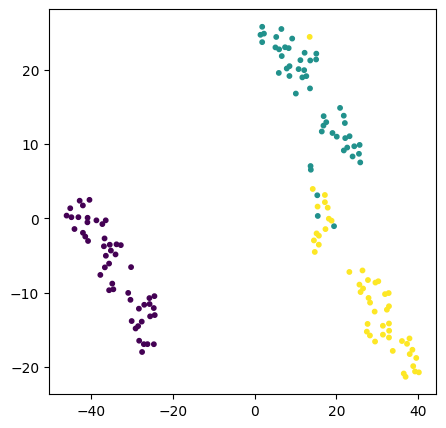

In [ ]:
X_tsne = TSNE(n_components=2, perplexity=10).fit_transform(x)    #learning_rate n_iter init
  
fig1 = plt.figure(figsize=(5,5), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, marker='o', s=10)

plt.show()

#### PCA vrs TSNE

In [ ]:
x_mnist, y_mnist = datasets.load_digits(return_X_y=True)

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pca_mnist = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))
pca_mnist.fit(x_mnist, y_mnist)
x_mnist_pca = pca_mnist.transform(x_mnist)

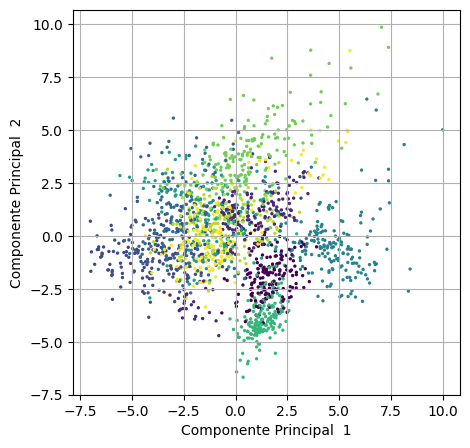

In [ ]:
fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=x_mnist_pca[:,0],y=x_mnist_pca[:,1],c=y_mnist,s=2)
ax.set_xlabel('Componente Principal  1', fontsize = 10)
ax.set_ylabel('Componente Principal  2', fontsize = 10)
ax.grid()

plt.show()

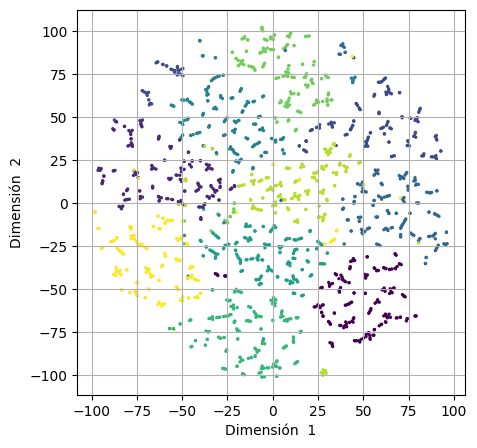

In [ ]:
tsne_mnist = make_pipeline(StandardScaler(), TSNE(n_components=2, perplexity=2, random_state=0))
tsne_mnist.fit(x_mnist, y_mnist)
x_tsne_mnist = tsne_mnist.fit_transform(x_mnist)

fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=x_tsne_mnist[:,0],y=x_tsne_mnist[:,1],c=y_mnist,s=2)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

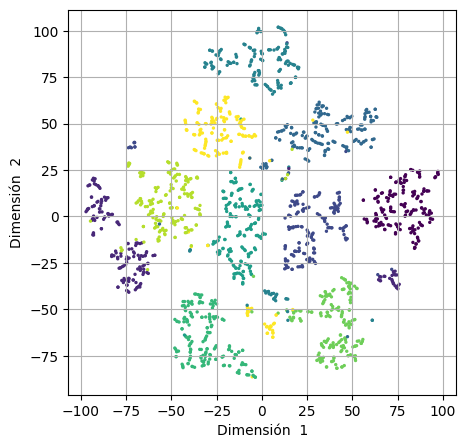

In [ ]:
tsne_mnist = make_pipeline(StandardScaler(), TSNE(n_components=2, perplexity=5, random_state=0))
tsne_mnist.fit(x_mnist, y_mnist)
x_tsne_mnist = tsne_mnist.fit_transform(x_mnist)

fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=x_tsne_mnist[:,0],y=x_tsne_mnist[:,1],c=y_mnist,s=2)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

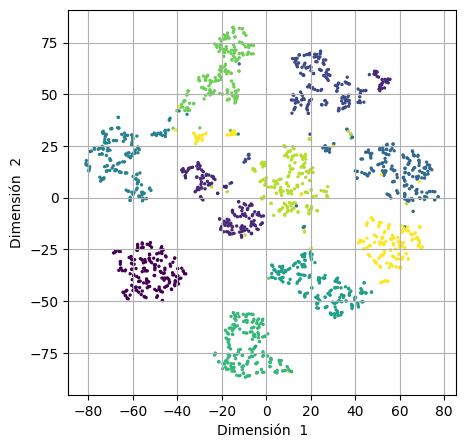

In [ ]:
tsne_mnist = make_pipeline(StandardScaler(), TSNE(n_components=2, perplexity=10, random_state=0))
tsne_mnist.fit(x_mnist, y_mnist)
x_tsne_mnist = tsne_mnist.fit_transform(x_mnist)

fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=x_tsne_mnist[:,0],y=x_tsne_mnist[:,1],c=y_mnist,s=2)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

In [ ]:
tsne_mnist = make_pipeline(StandardScaler(), TSNE(n_components=2, perplexity=15, random_state=0))
tsne_mnist.fit(x_mnist, y_mnist)
x_tsne_mnist = tsne_mnist.fit_transform(x_mnist)

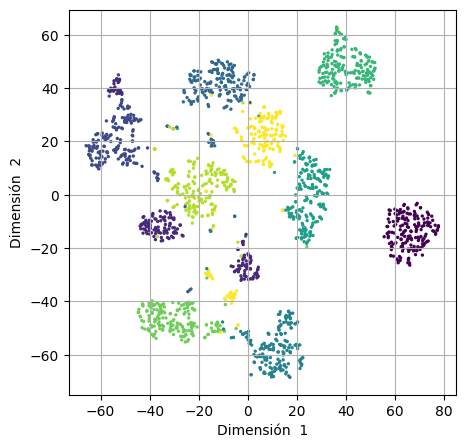

In [ ]:
fig = plt.figure(figsize = (5,5))
ax= fig.add_subplot(1,1,1) 

ax.scatter(x=x_tsne_mnist[:,0],y=x_tsne_mnist[:,1],c=y_mnist,s=2)
ax.set_xlabel('Dimensión  1', fontsize = 10)
ax.set_ylabel('Dimensión  2', fontsize = 10)
ax.grid()

plt.show()

### Ejemplo 2

** Swiss Roll **

In [ ]:
x_sr, color_sr = datasets.make_swiss_roll(n_samples=3000)

In [ ]:
x_sr

array([[11.73434381,  7.03729213,  5.62631269],
       [-1.19550083, 11.46542733,  7.91412093],
       [-4.98454532,  6.71049084, -9.24255898],
       ...,
       [ 7.40761442, 13.06560467, 11.35690754],
       [12.53499362, 12.60188988, -0.33671356],
       [-7.68157304, 11.2143457 ,  4.48710203]])

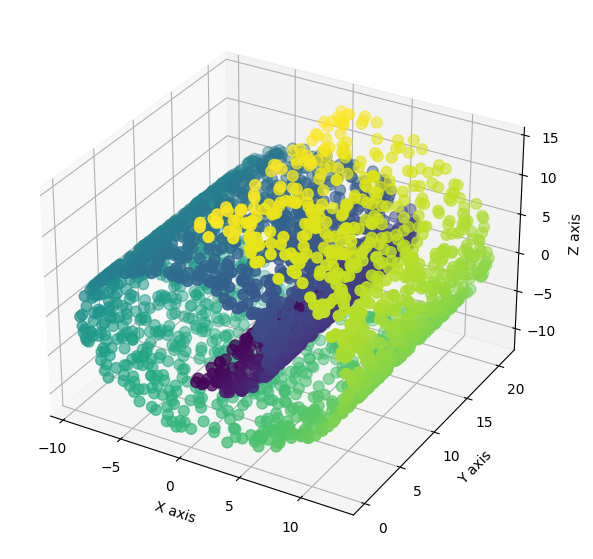

In [ ]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(x_sr[:, 0], x_sr[:, 1], x_sr[:, 2], c=color_sr, marker='o', s=60)

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

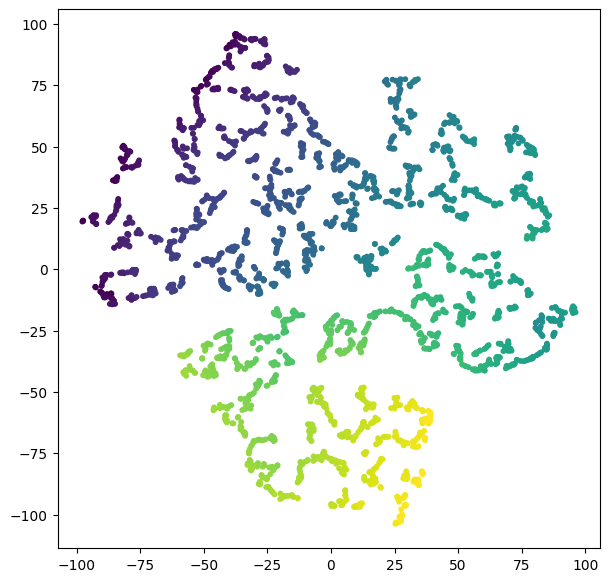

In [ ]:
x_sr_tsne_2 = TSNE(n_components=2, perplexity=10).fit_transform(x_sr)

fig1 = plt.figure(figsize=(7, 7), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(x_sr_tsne_2[:, 0], x_sr_tsne_2[:, 1], c=color_sr, marker='o', s=10)

plt.show()

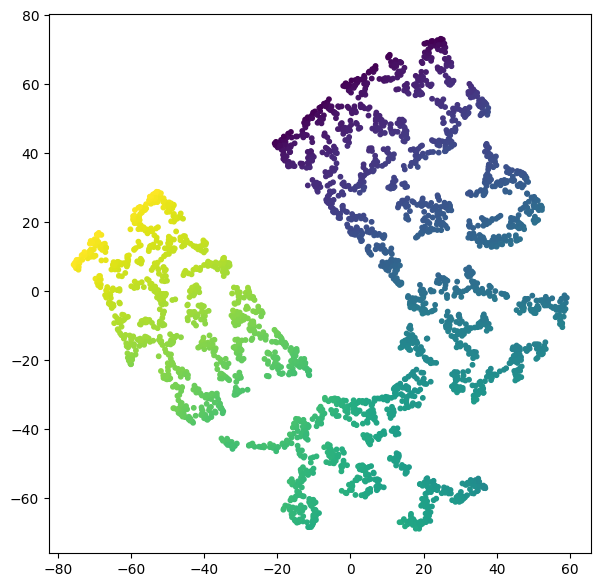

In [ ]:
x_sr_tsne = TSNE(n_components=2, perplexity=25).fit_transform(x_sr)

fig1 = plt.figure(figsize=(7, 7), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(x_sr_tsne[:, 0], x_sr_tsne[:, 1], c=color_sr, marker='o', s=10)

plt.show()

Al aumentar el valor de *perplexity*, el algoritmo toma más vecinos cercanos e intenta reproducir esa cercanía en el gráfico 2D, siendo la *perplexity* tan grande que llega a tomar puntos cercanos de la otra parte del *roll* e intenta reproducir esa cercanía.

<center>** Sigan probando con otras perplexities! **</center>

### Multidimentional Scaling

In [ ]:
x_sr, color_sr = datasets.make_swiss_roll(n_samples=1500)

In [ ]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2,metric=True,dissimilarity="euclidean")
mds_transformation = embedding.fit_transform(x_sr)

In [ ]:
#n=1
print(embedding.stress_)

65354137.56431912


In [ ]:
#n=2
print(embedding.stress_)

12058729.798408072


In [ ]:
#n=3
print(embedding.stress_)

37.81914345663933


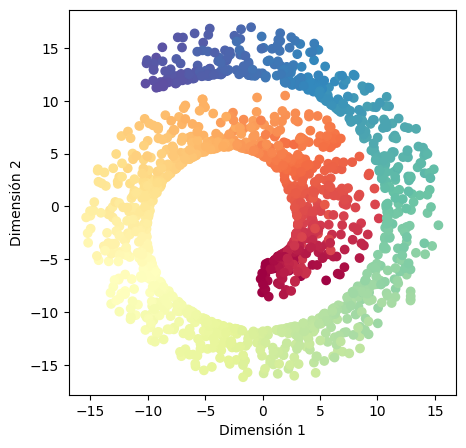

In [ ]:
fig1 = plt.figure(figsize=(5, 5), facecolor='white')

ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')

plt.scatter(
    mds_transformation[:, 0],
    mds_transformation[:, 1],
    c=color_sr,
    marker='o',
    cmap=plt.cm.Spectral,
)

plt.show()

### ISO Map

Utiliza un grafo de distancias en vecinos

In [ ]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
iso.fit(x_sr)
manifold_2Da = iso.transform(x_sr)

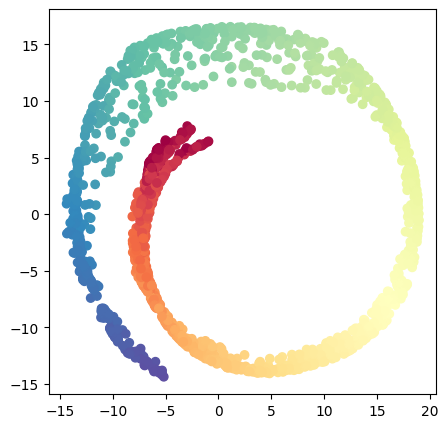

In [ ]:
fig1 = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color_sr, marker='o', cmap=plt.cm.Spectral
)
# plt.scatter(principalComponents[df_train['Survived']==0,0], principalComponents[df_train['Survived']==0,1], color='r', s=10)

plt.show()

Veamos ahora que sucede para un valor menor de cantidad de vecinos a observar

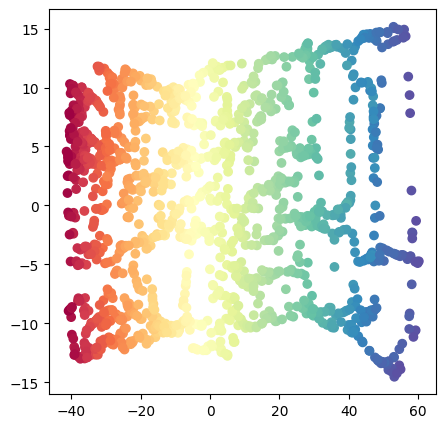

In [ ]:
iso = Isomap(n_neighbors=5, n_components=2)
iso.fit(x_sr)
manifold_2Da = iso.transform(x_sr)
fig1 = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color_sr, marker='o', cmap=plt.cm.Spectral
)
# plt.scatter(principalComponents[df_train['Survived']==0,0], principalComponents[df_train['Survived']==0,1], color='r', s=10)

plt.show()

Podemos verque los datos obtenidos son bastante parecidos aunque mas "esparsos", eso es debido a que el grafo esta menos contactado y por lo tanto algunas distancias se agrandan.

Ahora... que sucederá si en utilizamos una cantidad de vecinos bastante mas grande??

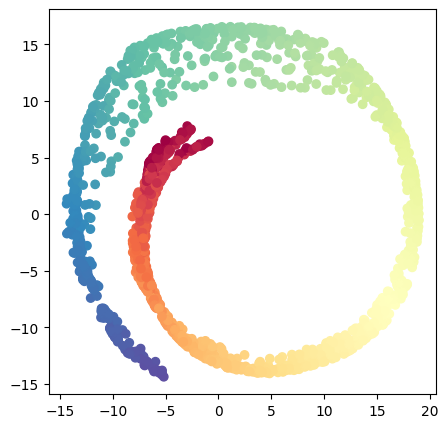

In [ ]:
iso = Isomap(n_neighbors=45, n_components=2)
iso.fit(x_sr)
manifold_2Da = iso.transform(x_sr)
fig1 = plt.figure(figsize=(5, 5), facecolor='white')
ax = fig1.add_subplot(1, 1, 1)
ax.set_facecolor('white')
plt.scatter(
    manifold_2Da[:, 0], manifold_2Da[:, 1], c=color_sr, marker='o', cmap=plt.cm.Spectral
)
# plt.scatter(principalComponents[df_train['Survived']==0,0], principalComponents[df_train['Survived']==0,1], color='r', s=10)

plt.show()

La reducción se parece mucho mas a las de las otras técnicas!

Pero, ¿porqué es esto?

Al incrementar demasiado la cantidad de vecinos a observar se pierda la noción de distancia geodésica.